# Penyelesaian Persamaan Diferensial

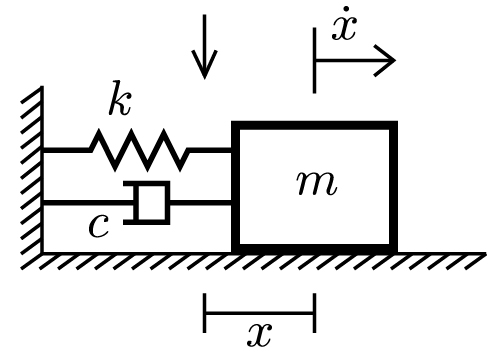

Diagram diatas merupakan diagram yang menunjukkan sebuah sistem pegas-massa teredam. Aplikasi dari sistem ini salah satunya adalah TMD (Tuned Mass Damper) untuk meredam gempa pada gedung.

Untuk mengamati dinamika dari benda di atas, maka kita dapat menggunakan hukum-hukum fisika yang ada. Sehingga didapat persamaan: $m \frac{d^2 x}{dt^2} + c \frac{dx}{dt} + kx = 0$, dengan $m$ merupakan massa benda, $c$ konstanta redaman, dan $k$ konstanta pegas. $x$ menyatakan jarak/posisi benda terhadap titik ekuilibriumnya, sedangkan $\frac{dx}{dt} = \dot{x} = v$ menyatakan kecepatan benda.

---

## Soal 1

Tuliskan sistem persamaan diferensial (orde 1) dalam bentuk

$$\dot x = f(t,x,v) $$
$$ \dot v = g(t,x,v) $$

bagi situasi di atas!

Boleh ditulis dengan LaTeX di Colab markdown, atau ditulis dan difoto.
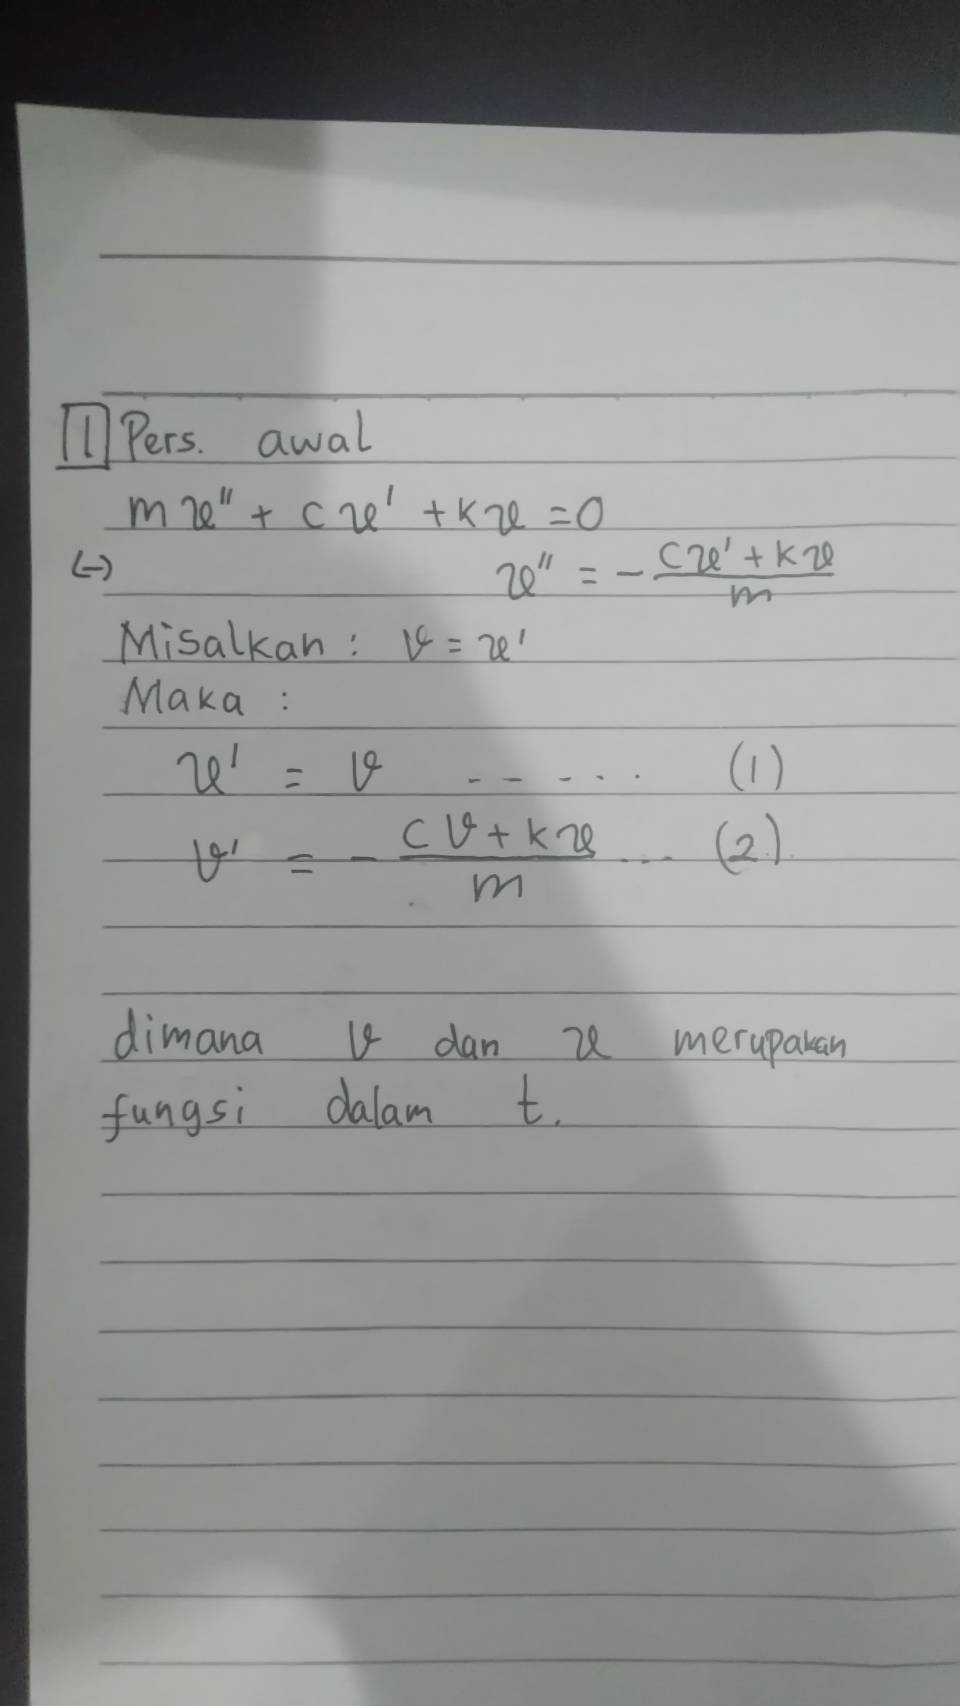

## Soal 2

Dengan menggunakan metode Runge-Kutta orde 4 (RK4), tentukan nilai $x(t)$ dan $v(t)$ suatu sistem pegas-massa teredam dengan massa benda ($m$), konstanta redaman ($c$), serta konstanta pegas ($k$) pada suatu selang waktu $[0, T]$ dengan lebar partisi waktu $dt$. Diberikan pula posisi awal benda terhadap titik ekuilibrium ($x_0$) dan kecepatan awal benda ($v_0$). Tentukan pula partisi waktu (bukan lebar partisi waktu) yang digunakan.

---

**Ketentuan Khusus:**

- Modul yang dapat digunakan:
  - numpy
  - math

---
**Asumsi:**
- $m > 0$
- $c \geq 0$
- $k > 0$
- $N_t = \frac{T}{dt}$ suatu bilangan bulat

---
**Fungsi RK4_pegas_massa:**
- Deskripsi: Mengaproksimasi posisi ($x$) dan kecepatan ($v$) untuk suatu sistem pegas-massa teredam, dengan massa benda $m$, konstanta pegas $k$, dan suatu konstanta redaman $c$ pada $t=0,dt,2dt,\dots,T$. Selain itu, diberikan pula posisi awal dan benda terhadap equilibrium ($x(0)=x_0$) dan kecepatan awal benda ($v(0)=v_0$). Aproksimasi menggunakan metode Runge-Kutta orde-4.
- Masukan:
  - $x_0$, $v_0$: float
  - $m$, $c$, $k$: float
  - $T$, $dt$: float
- Keluaran:
  - $t$: Array (**bukan array numpy**) dengan elemen-elemen float, berukuran $1 \times Nt+1$
  - $x$: Array (**bukan array numpy**) dengan elemen-elemen float, berukuran $1 \times Nt+1$
  - $v$: Array (**bukan array numpy**) dengan elemen-elemen float, berukuran $1 \times Nt+1$

In [ ]:
import numpy as np
import math
def RK_4_pegas_massa(x0, v0, m, c, k, T, dt):
    Nt = int((T-0)/dt)
    t = [i*dt for i in range(Nt+1)]   # Partisi waktu memuat titik ujung selang t = 0 dan t = T
    x = [0 for i in range(Nt+1)]
    v = [0 for i in range(Nt+1)]

    x[0] = x0
    v[0] = v0

    for i in range (Nt):
      
      #Mencari K dan L
      k1 = v[i]
      l1 = -(c*v[i]+k*x[i])/m
      k2 = v[i]+(l1/2)
      l2 = -(c*(v[i]+l1/2)+k*(x[i]+k1/2))/m
      k3 = v[i]+(l2/2)
      l3 = -(c*(v[i]+l2/2)+k*(x[i]+k2/2))/m
      k4 = v[i]+(l3)
      l4 = -(c*(v[i]+l3)+k*(x[i]+k3))/m

      #Mencari x dan v
      x[i+1] = x[i] + (dt/6)*(k1+2*k2+2*k3+k4)
      v[i+1] = v[i] + (dt/6)*(l1+2*l2+2*l3+l4)

    return [t, x, v]

## Soal 3

Diberikan
$$ x_0 = 5, v_0 = 0, m = 2, c = 0.1, k = 5, T = 100, dt = 0.1 $$

Gunakan `matplotlib.pyplot` untuk membuat grafik x-t untuk kondisi tersebut

Contoh penggunaan `matplotlib.pyplot`



```
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-5,6,1)
Y = X**2

plt.plot(X,Y)
plt.show()
```
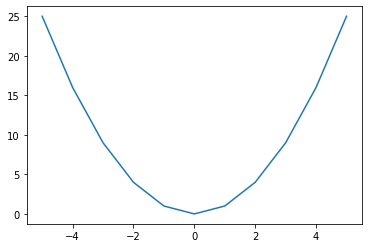


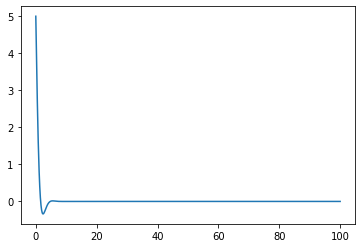

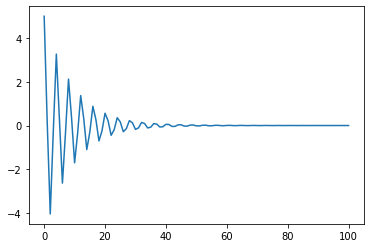

In [ ]:
import matplotlib.pyplot as plt


x0 = 5
v0 = 0
m = 2
c = 0.1
k = 5
T = 100
dt = 0.1

### Isi jawaban Anda di bawah ###

hasil = RK_4_pegas_massa(x0, v0, m, c, k, T, dt)

x = hasil[1]
t = hasil[0]

plt.plot(t,x)
plt.show()

'''
Grafiknya agak error gitu, kodingannya udah bener, tapi grafiknya x nya gak mau extend sampe -5.
Ngestuck di 0, jadinya grafiknya jelek. 

Coba bandingin sama grafik yg dibawah
'''

dt1 = 1
hasil = RK_4_pegas_massa(x0, v0, m, c, k, T, dt1)

x1 = hasil[1]
t1 = hasil[0]

plt.plot(t1,x1)
plt.show()